# Kerasで関数形の推定

**気が向いた**ので、話題にも上がったKerasに実際に関数を近似させるタスクを行わせてみた。

## 使用するパッケージ
* numpy
* matplotlib
* keras

## 方法

まず、必要なパッケージをimportする  

In [1]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


続いて訓練データとテストデータを作成する。今回使用する訓練データは (今まで教科書によく出てきた)**sin関数にノイズ (Gaussian, 分散0.1)が乗ったモデル**を採用する。
テストデータにはノイズは乗っていない

In [2]:
x_train = np.linspace(0, 10, 10000)
y_train = np.random.normal(np.sin(x_train)+1.5, 0.1)
x_test = np.linspace(0, 10, 10000)
y_test = np.sin(x_train)+1.5

ちなみに訓練データを図示すると下のような感じになる

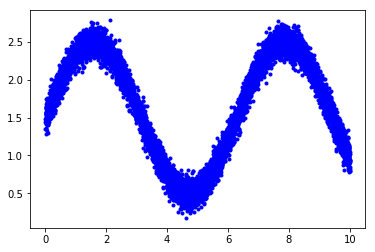

In [3]:
import matplotlib.pyplot as plt
plt.plot(x_train, y_train, 'b.')
plt.show()

続いてKerasを用いてニューラルネットワークを構築する。

In [4]:
model = Sequential()
# 層の追加、ノード数64、activation functionはReLU
model.add(Dense(units=64, activation='relu', input_shape=(1,)))
# 層の追加、ノード数64、activation functionはReLU
model.add(Dense(units=64, activation='relu'))
# 層の追加、ノード数1 (出力層)
model.add(Dense(units=1))
# ニューラルネットワークの構築、評価基準は二乗和誤差、最適化手法は確率的勾配降下法
model.compile(loss='mean_squared_error', optimizer='sgd')

このコードで次のようなニューラルネットワークが作れる
<img src="NN.png">

続いて訓練データを用いて実際に学習させる、これはfit関数を持ちいて1行ちょこっと書けばよい。
1つの訓練データを何回用いるかのパラメータであるepoch数は"うまいこと"指定する。

In [5]:
model.fit(x_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
10000/10000 [==============================] - 0s - loss: 0.5738     
Epoch 2/100
10000/10000 [==============================] - 0s - loss: 0.4151     
Epoch 3/100
10000/10000 [==============================] - 0s - loss: 0.3528     
Epoch 4/100
10000/10000 [==============================] - 0s - loss: 0.3009     
Epoch 5/100
10000/10000 [==============================] - 0s - loss: 0.2649     
Epoch 6/100
10000/10000 [==============================] - 0s - loss: 0.2418     
Epoch 7/100
10000/10000 [==============================] - 0s - loss: 0.2278     
Epoch 8/100
10000/10000 [==============================] - 0s - loss: 0.2167     
Epoch 9/100
10000/10000 [==============================] - 0s - loss: 0.2101     
Epoch 10/100
10000/10000 [==============================] - 0s - loss: 0.2047     
Epoch 11/100
10000/10000 [==============================] - 0s - loss: 0.2015     
Epoch 12/100
10000/10000 [==============================] - 0s - loss: 0.1965     
Epoch 13/100


10000/10000 [==============================] - 0s - loss: 0.0136     
Epoch 100/100
10000/10000 [==============================] - 0s - loss: 0.0139     


訓練されたモデルにおいて損失値も計算できる。
(分類問題であればaccuracyも出力できる。)

In [6]:
model.evaluate(x_test, y_test, batch_size=128)

  128/10000 [..............................] - ETA: 0s

0.0053507438381348036

ここからは実際にx座標を与えてy座標を予測させてみることを行う。そのためには下のようにpredict関数で1行書けばよい

In [12]:
y_predict = model.predict(np.linspace(0,10,10000), batch_size=128)

実際に関数を書かせてみたものが下の画像となる。青い点が訓練データ、赤い線がKerasで学習させたモデルとなる。直感的にはまあまあ一致しているように見える。

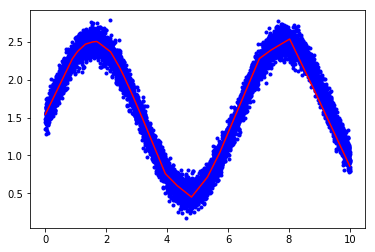

In [13]:
plt.plot(x_train, y_train, 'b.')
plt.plot(np.linspace(0,10,10000), y_predict, 'r')
plt.show()

ちなみに（意地悪して）訓練してないデータ範囲まで予測させるとこんなことになる。

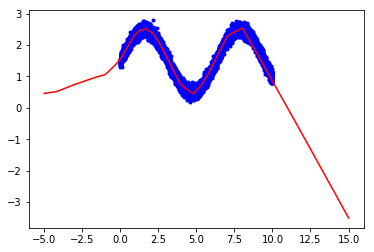

In [14]:
y_predict = model.predict(np.linspace(-5,15,10000), batch_size=128)
plt.plot(x_train, y_train, 'b.')
plt.plot(np.linspace(-5,15,10000), y_predict, 'r')
plt.show()

以上がKerasで関数近似を行う方法である。割と少ない行数でネットワークを構成できるのは良い。
他にも様々なexampleがKerasで公開されており、例えば手書き数字認識のチュートリアルはここにある。

https://github.com/fchollet/keras/blob/master/examples/mnist_cnn.py

70行ぐらいで作れるらしい